In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [83]:
df_wine = pd.read_csv("winequalityN.csv")
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df_wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
df_wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
df_wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [5]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df_wine.shape

(6497, 13)

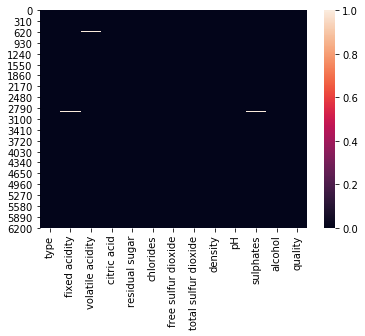

In [8]:
sns.heatmap(df_wine.isnull())

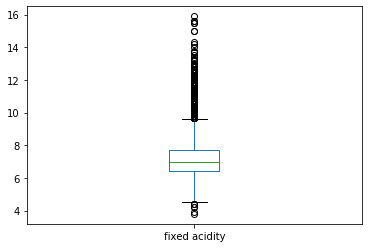

In [9]:
df_wine['fixed acidity'].plot.box()

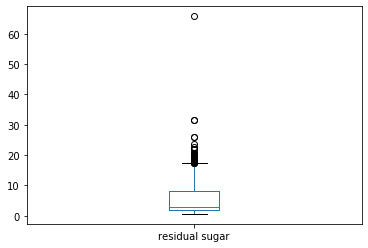

In [10]:
df_wine['residual sugar'].plot.box()

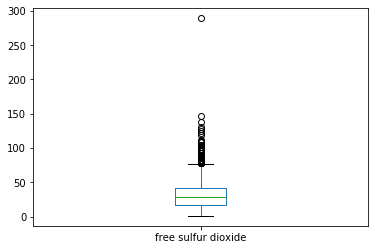

In [11]:
df_wine['free sulfur dioxide'].plot.box()

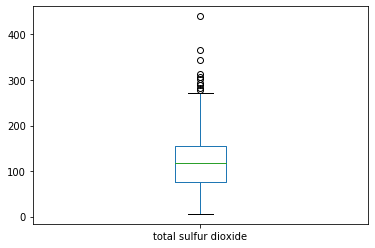

In [12]:
df_wine['total sulfur dioxide'].plot.box()

In [13]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
df_wine['type']=label_encoder.fit_transform(df_wine['type'])

In [16]:
df_wine['type'].unique()

array([1, 0])

In [17]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df_wine.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
z=np.abs(stats.zscore(df_wine))
print(z)

[[0.57136659        nan        nan ...        nan 1.41855821 0.20799905]
 [0.57136659        nan        nan ...        nan 0.83161516 0.20799905]
 [0.57136659        nan        nan ...        nan 0.32852111 0.20799905]
 ...
 [1.75018984        nan        nan ...        nan 0.42611996 0.20799905]
 [1.75018984        nan        nan ...        nan 0.2446721  0.93722961]
 [1.75018984        nan        nan ...        nan 0.42611996 0.20799905]]


In [20]:
threshold=3
print(np.where(z>3))

(array([ 251,  253,  294,  325,  325,  395,  405,  445,  659,  740,  774,
        820,  827,  873,  876, 1034, 1229, 1257, 1417, 1417, 1484, 1605,
       1653, 1663, 1688, 1688, 1842, 1931, 1931, 1931, 2050, 2127, 2334,
       2336, 2373, 2575, 2625, 2654, 2728, 2735, 2748, 2750, 2781, 2872,
       2893, 3050, 3072, 3087, 3152, 3265, 3307, 3307, 3379, 3387, 3409,
       3461, 3470, 3520, 3523, 3620, 3810, 3861, 3862, 3863, 3868, 3869,
       3871, 3918, 4745, 4745, 4745, 4841, 5357, 5415, 5550, 5588, 5730,
       5797, 5979, 6197, 6272, 6367, 6376, 6403]), array([12, 12, 12,  6,  7,  6,  6, 12,  6, 12, 12, 12, 12, 12, 12, 12, 12,
        6,  7, 12, 12, 12,  8,  8,  6, 12,  6,  6,  7, 12, 12,  7,  6,  6,
       12,  6,  6,  7,  6,  6,  6,  6,  8,  6,  6,  6,  6, 12,  7, 12,  6,
       12,  6,  6, 12,  6,  6,  6,  6,  6, 12,  6,  6,  6,  6,  6,  6, 11,
        6,  7, 12,  6, 12, 12, 11, 12, 12, 12,  7, 12, 12, 12, 12, 12]))


/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [21]:
z[251][12]

3.2276869411650764

In [22]:
z[294][12]

3.2276869411650764

In [23]:
z[325][6]

5.661172501361502

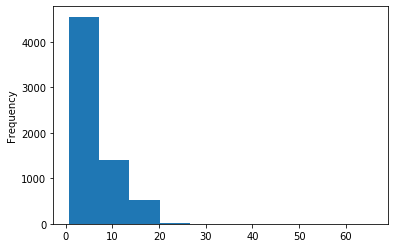

In [24]:
df_wine['residual sugar'].plot.hist()

In [25]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
df_wine.shape

(6497, 13)

In [27]:
df_wine.skew()

type                   -1.179095
fixed acidity           1.722805
volatile acidity        1.495512
citric acid             0.473032
residual sugar          1.435000
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

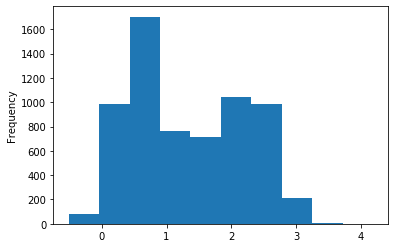

In [28]:
df_wine['residual sugar']=np.log(df_wine['residual sugar'])
df_wine['residual sugar'].plot.hist()

In [29]:
df_wine.skew()

type                   -1.179095
fixed acidity           1.722805
volatile acidity        1.495512
citric acid             0.473032
residual sugar          0.240195
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

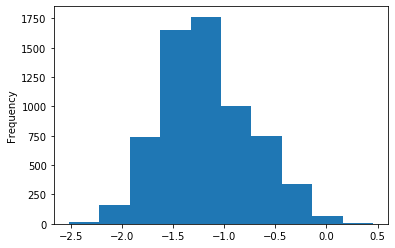

In [30]:
df_wine['volatile acidity']=np.log(df_wine['volatile acidity'])
df_wine['volatile acidity'].plot.hist()

In [31]:
df_wine.skew()

type                   -1.179095
fixed acidity           1.722805
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

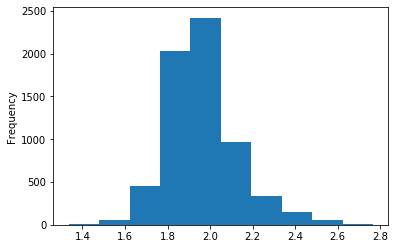

In [32]:
df_wine['fixed acidity']=np.log(df_wine['fixed acidity'])
df_wine['fixed acidity'].plot.hist()

In [33]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.888679
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

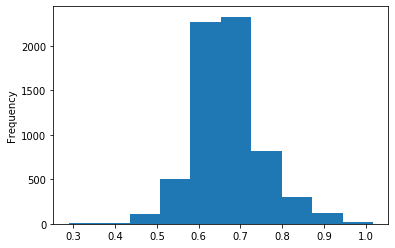

In [34]:
df_wine['fixed acidity']=np.log(df_wine['fixed acidity'])
df_wine['fixed acidity'].plot.hist()

In [35]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

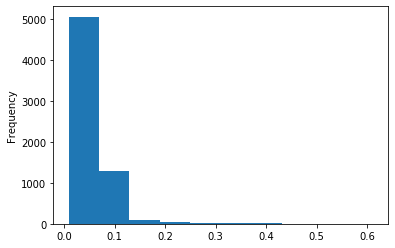

In [36]:
df_wine['chlorides'].plot.hist()

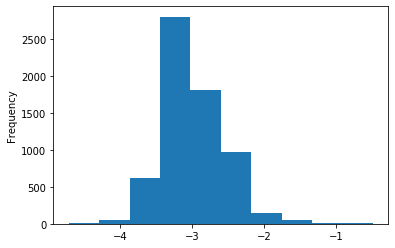

In [37]:
df_wine['chlorides']=np.log(df_wine['chlorides'])
df_wine['chlorides'].plot.hist()

In [38]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               0.876744
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

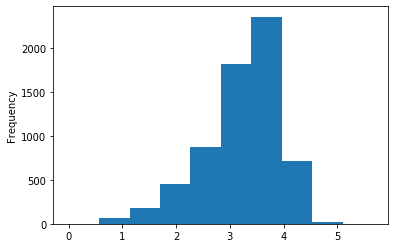

In [39]:
df_wine['free sulfur dioxide']=np.log(df_wine['free sulfur dioxide'])
df_wine['free sulfur dioxide'].plot.hist()

In [40]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               0.876744
free sulfur dioxide    -0.834197
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

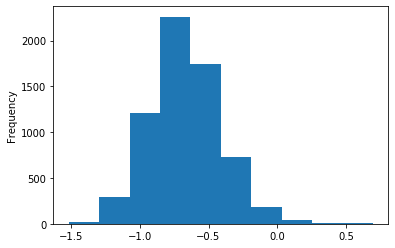

In [41]:
df_wine['sulphates']=np.log(df_wine['sulphates'])
df_wine['sulphates'].plot.hist()

In [42]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               0.876744
free sulfur dioxide    -0.834197
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               0.405698
alcohol                 0.565718
quality                 0.189623
dtype: float64

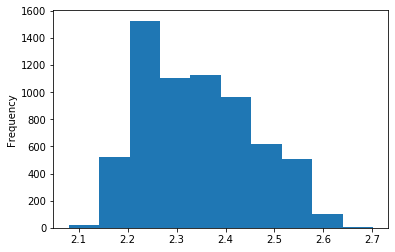

In [43]:
df_wine['alcohol']=np.log(df_wine['alcohol'])
df_wine['alcohol'].plot.hist()

In [44]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               0.876744
free sulfur dioxide    -0.834197
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               0.405698
alcohol                 0.381860
quality                 0.189623
dtype: float64

In [45]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               0.876744
free sulfur dioxide    -0.834197
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               0.405698
alcohol                 0.381860
quality                 0.189623
dtype: float64

In [46]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               0.876744
free sulfur dioxide    -0.834197
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               0.405698
alcohol                 0.381860
quality                 0.189623
dtype: float64

In [47]:
df_wine.skew()

type                   -1.179095
fixed acidity           0.517569
volatile acidity        0.328433
citric acid             0.473032
residual sugar          0.240195
chlorides               0.876744
free sulfur dioxide    -0.834197
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               0.405698
alcohol                 0.381860
quality                 0.189623
dtype: float64

In [48]:
df_wine.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [50]:
df_wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

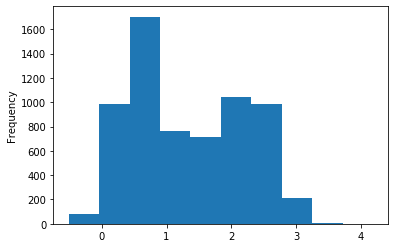

In [51]:
df_wine['residual sugar'].plot.hist()

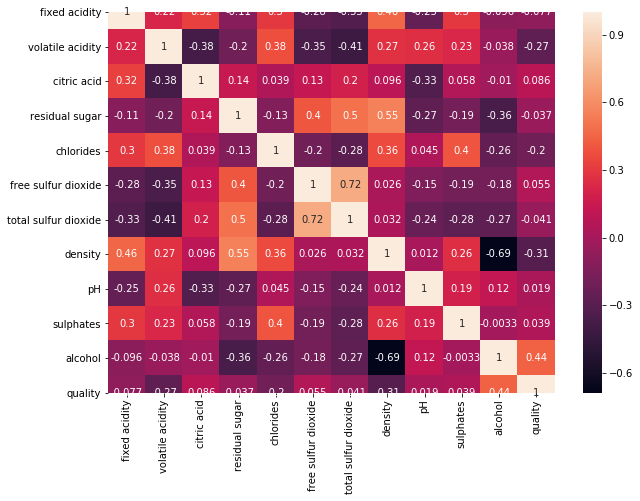

In [54]:
corr_hmap=df_wine.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [55]:
df_wine.shape

(6497, 13)

In [61]:
x = df_wine.iloc[:,0:-1]

In [62]:
x

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [63]:
y = df_wine.iloc[:,-1]

In [64]:
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [69]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
df_wine['type']=label_encoder.fit_transform(df_wine['type'])

In [72]:
df_wine['type'].unique()

array([1, 0])

In [73]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [74]:
x = df_wine.iloc[:,0:-1]

In [75]:
x

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [76]:
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


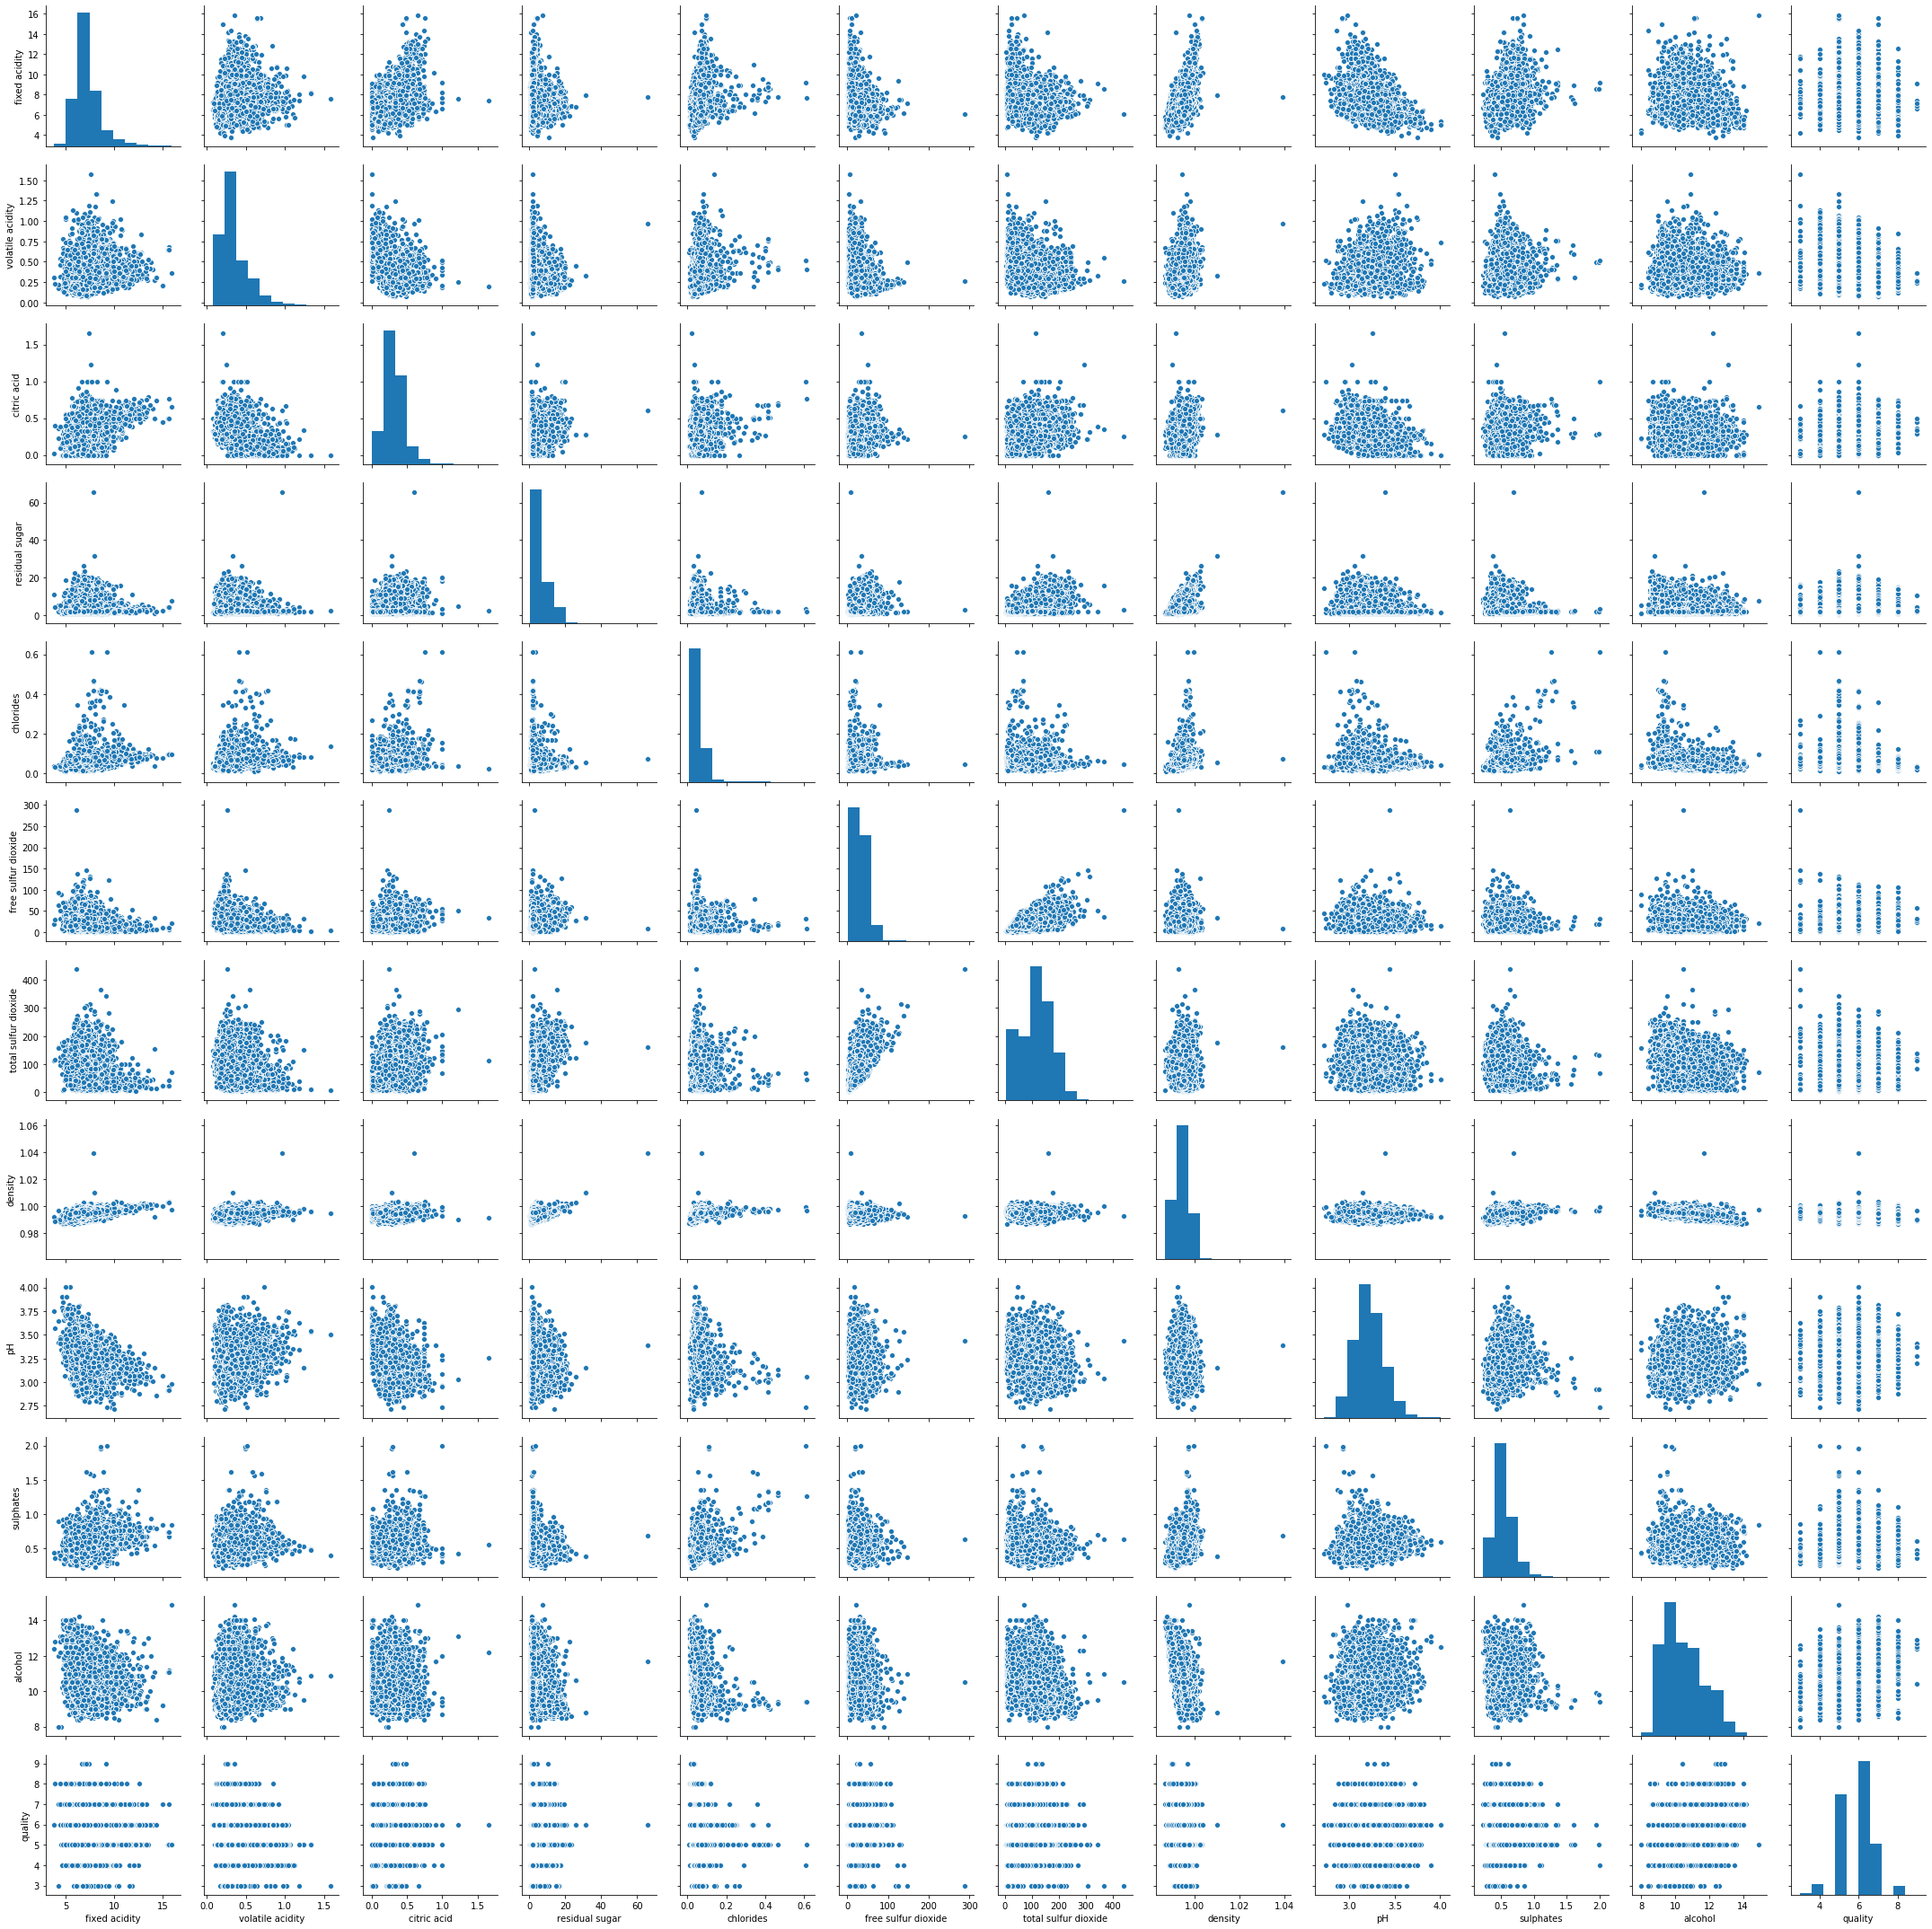

In [89]:
sns.pairplot(df_wine)

In [90]:
df_wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [96]:
df_wine['fixed acidity'] = df_wine['fixed acidity'].fillna((df_wine['fixed acidity'].mean()))

In [99]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [98]:
df_wine['sulphates'] = df_wine['sulphates'].fillna((df_wine['sulphates'].mean()))

In [100]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [102]:
df_wine['citric acid'] = df_wine['citric acid'].fillna((df_wine['citric acid'].mean()))

In [103]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             0
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [104]:
df_wine['pH'] = df_wine['pH'].fillna((df_wine['pH'].mean()))

In [105]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             0
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [106]:
df_wine['volatile acidity'] = df_wine['volatile acidity'].fillna((df_wine['volatile acidity'].mean()))

In [107]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [108]:
df_wine['chlorides'] = df_wine['chlorides'].fillna((df_wine['chlorides'].mean()))

In [109]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [110]:
df_wine['residual sugar'] = df_wine['residual sugar'].fillna((df_wine['residual sugar'].mean()))

In [111]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [112]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [114]:
scale = MinMaxScaler()

In [115]:
x=scale.fit_transform(x)

In [116]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.22,random_state=42)

In [185]:
x_train.shape

(5067, 12)

In [186]:
y_train.shape

(5067,)

In [187]:
x_test.shape

(1430, 12)

In [188]:
y_test.shape

(1430,)

In [117]:
dt = DecisionTreeClassifier()

In [118]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.5874125874125874
[[  0   0   3   1   0   0   0]
 [  2  15  15  10   5   0   0]
 [  5  17 303 122  14   1   0]
 [  1  10 129 394  85  18   0]
 [  0   5  18  91 118  13   0]
 [  0   0   3  11  10  10   1]
 [  0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.32      0.32      0.32        47
           5       0.64      0.66      0.65       462
           6       0.63      0.62      0.62       637
           7       0.51      0.48      0.49       245
           8       0.24      0.29      0.26        35
           9       0.00      0.00      0.00         0

    accuracy                           0.59      1430
   macro avg       0.33      0.34      0.34      1430
weighted avg       0.59      0.59      0.59      1430



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [120]:
svc = SVC()

In [121]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5307692307692308
[[  0   0   2   2   0   0]
 [  0   0  29  18   0   0]
 [  0   0 293 169   0   0]
 [  0   0 171 466   0   0]
 [  0   0  19 226   0   0]
 [  0   0   1  34   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        47
           5       0.57      0.63      0.60       462
           6       0.51      0.73      0.60       637
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00        35

    accuracy                           0.53      1430
   macro avg       0.18      0.23      0.20      1430
weighted avg       0.41      0.53      0.46      1430



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
lr = LogisticRegression()

In [125]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.5412587412587413
[[  0   0   2   2   0   0]
 [  0   0  30  17   0   0]
 [  0   0 292 170   0   0]
 [  0   0 159 475   3   0]
 [  0   0  17 221   7   0]
 [  0   0   1  33   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        47
           5       0.58      0.63      0.61       462
           6       0.52      0.75      0.61       637
           7       0.64      0.03      0.05       245
           8       0.00      0.00      0.00        35

    accuracy                           0.54      1430
   macro avg       0.29      0.23      0.21      1430
weighted avg       0.53      0.54      0.48      1430



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [127]:
rf = RandomForestClassifier()

In [138]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6503496503496503
[[  0   1   2   1   0   0]
 [  1  10  24  12   0   0]
 [  0   2 354 105   1   0]
 [  0   1 142 441  49   4]
 [  0   2  12 113 115   3]
 [  0   0   0  16   9  10]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.62      0.21      0.32        47
           5       0.66      0.77      0.71       462
           6       0.64      0.69      0.67       637
           7       0.66      0.47      0.55       245
           8       0.59      0.29      0.38        35

    accuracy                           0.65      1430
   macro avg       0.53      0.40      0.44      1430
weighted avg       0.65      0.65      0.64      1430



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [130]:
mnb = MultinomialNB()

In [131]:
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.44545454545454544
[[  0   0   0   4   0   0]
 [  0   0   1  46   0   0]
 [  0   0   1 461   0   0]
 [  0   0   1 636   0   0]
 [  0   0   0 245   0   0]
 [  0   0   0  35   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        47
           5       0.33      0.00      0.00       462
           6       0.45      1.00      0.62       637
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00        35

    accuracy                           0.45      1430
   macro avg       0.13      0.17      0.10      1430
weighted avg       0.31      0.45      0.28      1430



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
score=cross_val_score(mnb,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.43558282 0.43558282 0.43558282 0.43625192 0.43471582 0.43692308
 0.4367284  0.4367284  0.438949   0.44272446]
0.4369769528807235
0.002202689760764431


/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [135]:
svc = SVC()
score=cross_val_score(svc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/

[0.46779141 0.48619632 0.50306748 0.52534562 0.52227343 0.55076923
 0.56790123 0.5617284  0.48531685 0.54179567]
0.5212185635362598
0.03291585603627148


In [136]:
rf = RandomForestClassifier()

In [140]:
score=cross_val_score(rf,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.47546012 0.45092025 0.48619632 0.52995392 0.52534562 0.54153846
 0.54938272 0.52469136 0.4064915  0.50309598]
0.49930762363590075
0.04273593069915103


In [141]:
KNN=KNeighborsClassifier(n_neighbors=6)

In [143]:
score=cross_val_score(KNN,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.47699387 0.46779141 0.46625767 0.50076805 0.50537634 0.49538462
 0.55555556 0.4845679  0.44358578 0.52012384]
0.4916405029735972
0.02994880247259357


In [152]:
dt_gini=DecisionTreeClassifier(criterion='entropy',random_state=100)
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [153]:
pred=dt_gini.predict(x_test)
accuracy_score(y_test,pred)

0.6034965034965035

In [159]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/pyth

[0.48540707 0.51769231 0.52923077 0.55701079 0.40323824]
0.49851583417935935
0.05288187419967201


In [156]:
svmkernel('rbf')

In [158]:
svmkernel('poly')

In [160]:
dt=DecisionTreeClassifier()

In [165]:
grid_param = {
    'criterion' : ['gini','entropy'],
}

gd_sr=GridSearchCV(estimator=dt,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [183]:
rf = RandomForestClassifier(n_estimators=100,random_state=46)

In [184]:
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6972027972027972
[[  0   0   2   2   0   0]
 [  0   6  30  10   1   0]
 [  0   1 347 113   1   0]
 [  0   0  99 507  30   1]
 [  0   0   8 107 128   2]
 [  0   0   1  16   9   9]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.86      0.13      0.22        47
           5       0.71      0.75      0.73       462
           6       0.67      0.80      0.73       637
           7       0.76      0.52      0.62       245
           8       0.75      0.26      0.38        35

    accuracy                           0.70      1430
   macro avg       0.62      0.41      0.45      1430
weighted avg       0.71      0.70      0.68      1430



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [201]:
ad=AdaBoostClassifier(n_estimators=200, base_estimator=rf,algorithm='SAMME')
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.6881118881118881
[[  0   0   3   1   0   0]
 [  0   6  27  11   3   0]
 [  0   0 350 111   1   0]
 [  0   0 106 503  27   1]
 [  0   0   6 121 116   2]
 [  0   0   1  15  10   9]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.13      0.23        47
           5       0.71      0.76      0.73       462
           6       0.66      0.79      0.72       637
           7       0.74      0.47      0.58       245
           8       0.75      0.26      0.38        35

    accuracy                           0.69      1430
   macro avg       0.64      0.40      0.44      1430
weighted avg       0.70      0.69      0.67      1430



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [204]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.593006993006993
[[  0   0   3   1   0   0]
 [  3   7  25  10   2   0]
 [  4   6 303 147   2   0]
 [  0   0 138 452  45   2]
 [  1   0   9 150  80   5]
 [  0   0   1  16  12   6]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.54      0.15      0.23        47
           5       0.63      0.66      0.64       462
           6       0.58      0.71      0.64       637
           7       0.57      0.33      0.41       245
           8       0.46      0.17      0.25        35

    accuracy                           0.59      1430
   macro avg       0.46      0.34      0.36      1430
weighted avg       0.59      0.59      0.58      1430

